In [165]:
import nltk
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Disable SSL certificate verification
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Ensure NLTK data directory exists and specify it
import os
nltk_data_dir = os.path.expanduser('~/nltk_data')
if not os.path.exists(nltk_data_dir):
    os.makedirs(nltk_data_dir)
nltk.data.path.append(nltk_data_dir)

# Download NLTK resources
nltk.download('stopwords')

# nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.svm import SVC


sns.set(font_scale=1.3)

from wordcloud import WordCloud, STOPWORDS
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/supriyakommini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [95]:
# Read datasets
df_train = pd.read_csv('/Users/supriyakommini/Amrita/AI & ML/Project/Emotion Detection/sentiment analysis using text/train.txt', names=['Text', 'Emotion'], sep=';')
df_val = pd.read_csv('/Users/supriyakommini/Amrita/AI & ML/Project/Emotion Detection/sentiment analysis using text/val.txt', names=['Text', 'Emotion'], sep=';')
df_test = pd.read_csv('/Users/supriyakommini/Amrita/AI & ML/Project/Emotion Detection/sentiment analysis using text/test.txt', names=['Text', 'Emotion'], sep=';')


In [96]:
#print first 5 rows
print(df_train.head())
print(df_train.shape)

                                                Text  Emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger
(16000, 2)


In [97]:
#print first 5 rows
print(df_test.head())
print(df_test.shape)


                                                Text  Emotion
0  im feeling rather rotten so im not very ambiti...  sadness
1          im updating my blog because i feel shitty  sadness
2  i never make her separate from me because i do...  sadness
3  i left with my bouquet of red and yellow tulip...      joy
4    i was feeling a little vain when i did this one  sadness
(2000, 2)


In [98]:
#print first 5 rows
print(df_val.head())
print(df_val.shape)

                                                Text  Emotion
0  im feeling quite sad and sorry for myself but ...  sadness
1  i feel like i am still looking at a blank canv...  sadness
2                     i feel like a faithful servant     love
3                  i am just feeling cranky and blue    anger
4  i can have for a treat or if i am feeling festive      joy
(2000, 2)


In [99]:
#Assessing
#Train dataset

#check if the data is balanced or not
print(df_train.Emotion.value_counts())


Emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64


In [100]:

#check if the data is balanced or not
print(df_train.Emotion.value_counts() / df_train.shape[0] *100)
#The data is imbalanced so, we may try to balance it but also, the emotions that we interested in are the most repeated emotion so, till now we can keep the data as it is

Emotion
joy         33.51250
sadness     29.16250
anger       13.49375
fear        12.10625
love         8.15000
surprise     3.57500
Name: count, dtype: float64


In [101]:
#print the number of null values in each column
print(df_train.isnull().sum())
#The data doesn't contains any null values

Text       0
Emotion    0
dtype: int64


In [102]:
#print the number of duplicated values 
print(df_train.duplicated().sum())

#There is just one row which is duplicated but we need to check also if there are rows having the same text but different emotions


1


In [103]:
#removing duplicated values
index = df_train[df_train.duplicated() == True].index
df_train.drop(index, axis = 0, inplace = True)
df_train.reset_index(inplace=True, drop = True)

In [104]:
#print the rows which are duplicated (duplicated in the text but with different emotions)
print(df_train[df_train['Text'].duplicated() == True])

                                                    Text   Emotion
5067   i feel on the verge of tears from weariness i ...       joy
6133               i still feel a craving for sweet food      love
6563   i tend to stop breathing when i m feeling stre...     anger
7623   i was intensely conscious of how much cash i h...   sadness
7685   im still not sure why reilly feels the need to...  surprise
8246   i am not amazing or great at photography but i...      love
9596   ive also made it with both sugar measurements ...       joy
9687   i had to choose the sleek and smoother feel of...       joy
9769   i often find myself feeling assaulted by a mul...   sadness
9786        i feel im being generous with that statement       joy
10117  i feel pretty tortured because i work a job an...      fear
10581                       i feel most passionate about       joy
11273  i was so stubborn and that it took you getting...       joy
11354  i write these words i feel sweet baby kicks fr...      

In [105]:
#print some of those rows to check
df_train[df_train['Text'] == df_train.iloc[9769]['Text']]

,Text,Emotion
4602,i often find myself feeling assaulted by a mul...,fear
9769,i often find myself feeling assaulted by a mul...,sadness


In [106]:
#removing duplicated text 
index = df_train[df_train['Text'].duplicated() == True].index
df_train.drop(index, axis = 0, inplace = True)
df_train.reset_index(inplace=True, drop = True)

In [107]:
#Count the number of stopwords in the data
temp =df_train.copy()
stop_words = set(stopwords.words("english"))
temp['stop_words'] = temp['Text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

stop_words
5     1416
7     1405
6     1392
4     1341
8     1319
3     1263
9     1177
10    1048
2      922
11     889
12     752
13     644
14     493
1      450
15     376
16     265
17     238
18     164
19     113
20      90
0       79
21      60
22      33
23      19
24       7
25       6
26       6
28       1
29       1
Name: count, dtype: int64

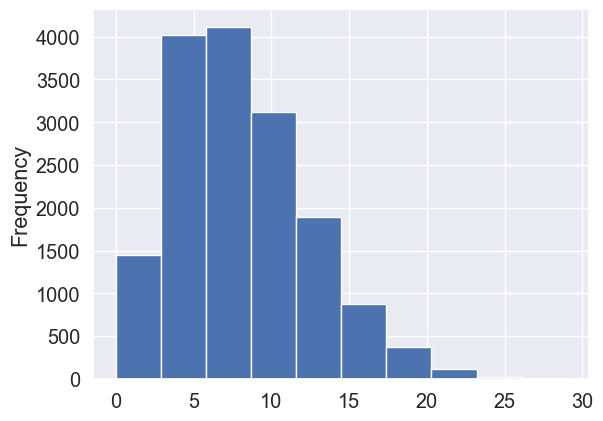

In [108]:
#distribution of stopwords visually
temp['stop_words'].plot(kind= 'hist')
plt.show()

In [111]:
def plotting(df):
    col = 'Emotion'
    fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
    explode = list((np.array(list(df[col].dropna().value_counts()))/sum(list(df[col].dropna().value_counts())))[::-1])
    sizes = df[col].value_counts()
    labels = sizes.index
    #ax.pie(sizes, explode=explode, colors=bo, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
    ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
    ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
    sns.countplot(x =col, data = df, ax=ax1)
    ax1.set_title("Count of each emotion")
    ax2.set_title("Percentage of each emotion")
    plt.show()

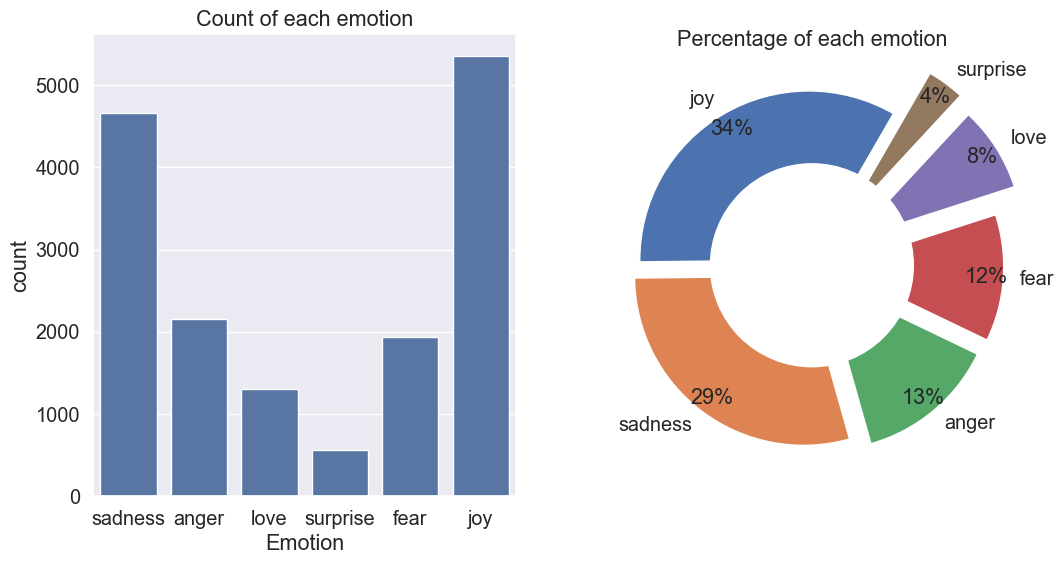

In [112]:
plotting(df_train)

In [113]:
#TEST DATASET
#check if the data is balanced or not
df_test.Emotion.value_counts()

Emotion
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: count, dtype: int64

In [114]:
#print the number of null values in each column
df_test.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [115]:
#print the number of duplicated values 
df_test.duplicated().sum()

0

In [116]:
#print the rows which are duplicated
df_test[df_test['Text'].duplicated() == True]

,Text,Emotion


In [117]:
#Count the number of stopwords in the data
temp =df_test.copy()
temp['stop_words'] = temp['Text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

stop_words
7     184
6     179
3     175
5     175
4     163
9     163
8     139
10    123
2     118
11    115
12     84
13     71
15     61
14     58
1      42
16     40
17     31
18     22
20     17
19     11
21     10
0       8
23      7
24      2
22      2
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

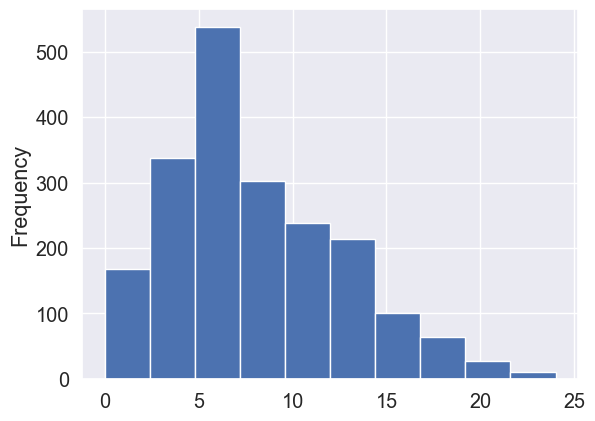

In [118]:
sns.set(font_scale=1.3)
temp['stop_words'].plot(kind= 'hist')

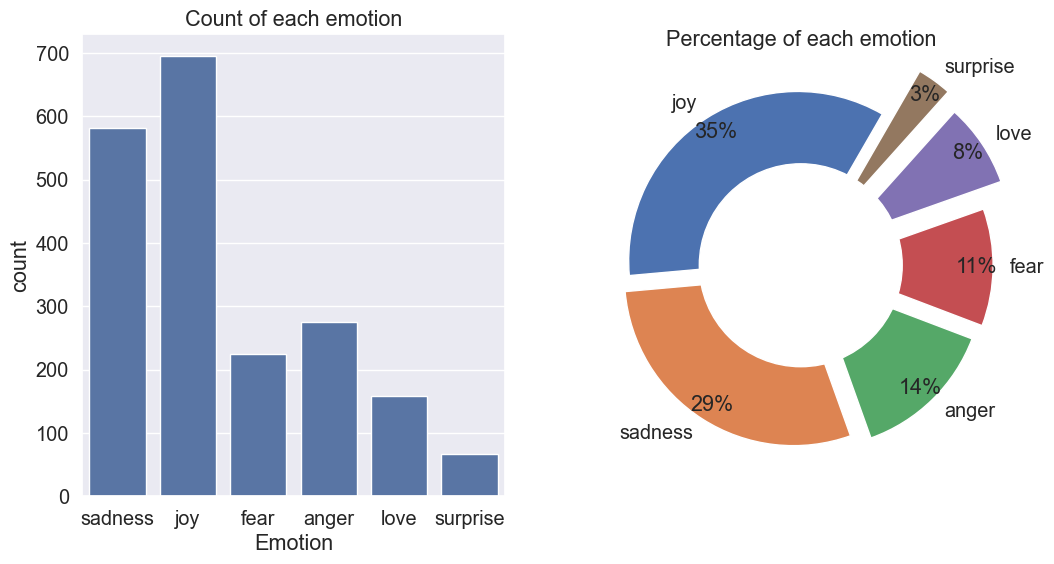

In [119]:
plotting(df_test)

In [121]:
#Validation dataset
#check if the data is balanced or not
df_val.Emotion.value_counts()


Emotion
joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: count, dtype: int64

In [122]:
#print the number of null values in each column
df_val.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [123]:
#print the number of duplicated values 
df_val.duplicated().sum()

0

In [124]:
#print the rows which are duplicated
df_val[df_val['Text'].duplicated() == True]

,Text,Emotion
603,i have had several new members tell me how com...,joy
1993,i feel so tortured by it,anger


In [125]:
df_val[df_val['Text'] == df_val.iloc[603]['Text']]

,Text,Emotion
300,i have had several new members tell me how com...,love
603,i have had several new members tell me how com...,joy


In [126]:
df_val[df_val['Text'] == df_val.iloc[1993]['Text']]

,Text,Emotion
774,i feel so tortured by it,fear
1993,i feel so tortured by it,anger


In [127]:
#removing duplicated text
index = df_val[df_val['Text'].duplicated() == True].index
df_val.drop(index, axis = 0, inplace = True)
df_val.reset_index(inplace=True, drop = True)

In [128]:
#Count the number of stopwords in the data
temp =df_val.copy()
temp['stop_words'] = temp['Text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

stop_words
7     190
5     175
8     173
6     160
3     160
10    150
9     146
4     145
2     133
11    103
12     76
13     74
1      64
14     63
15     44
16     36
17     31
18     21
19     16
20     16
0      11
21      6
22      3
23      2
Name: count, dtype: int64

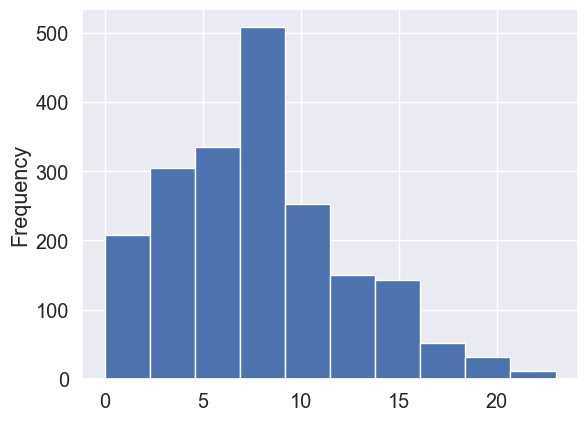

In [129]:
sns.set(font_scale=1.3)
temp['stop_words'].plot(kind= 'hist');

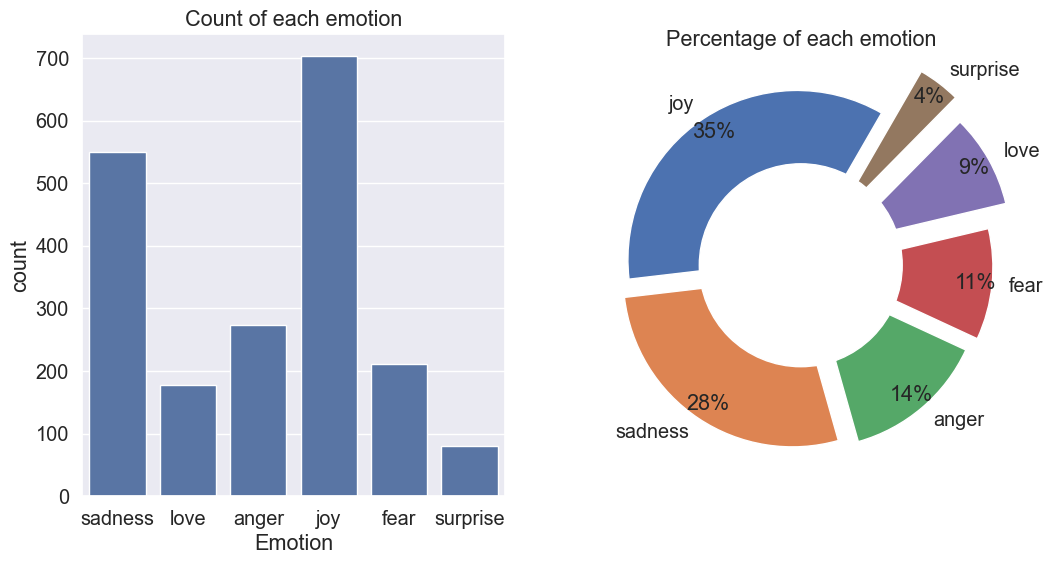

In [130]:
plotting(df_val)

In [133]:
#Compare rows of the datasets¶
#check that there is no data leakage
def dataframe_difference(df1, df2, which=None):
    
    comparison_df = df1.merge(
        df2,
        indicator=True,
        how='outer'
    )
    

    if which is None:
        diff_df = comparison_df[comparison_df['_merge'] != 'both']
    else:
        diff_df = comparison_df[comparison_df['_merge'] == which]
        
    # Return the filtered DataFrame
    return diff_df

In [134]:
dataframe_difference(df_train, df_test, which='both')

,Text,Emotion,_merge


In [135]:
dataframe_difference(df_train, df_val, which='both')

,Text,Emotion,_merge


In [136]:
dataframe_difference(df_val, df_test, which='both')

,Text,Emotion,_merge


In [49]:
#CLEANING
def lemmatization(text):
    lemmatizer= WordNetLemmatizer()
    text = text.split()
    text=[lemmatizer.lemmatize(y) for y in text]
    return " " .join(text)
    
def remove_stop_words(text):
    Text=[i for i in str(text).split() if i not in stop_words]
    return " ".join(Text)

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def lower_case(text):
    text = text.split()
    text=[y.lower() for y in text]
    return " " .join(text)

def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )
    
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan
            
def normalize_text(df):
    df.Text=df.Text.apply(lambda text : lower_case(text))
    df.Text=df.Text.apply(lambda text : remove_stop_words(text))
    df.Text=df.Text.apply(lambda text : Removing_numbers(text))
    df.Text=df.Text.apply(lambda text : Removing_punctuations(text))
    df.Text=df.Text.apply(lambda text : Removing_urls(text))
    df.Text=df.Text.apply(lambda text : lemmatization(text))
    return df

def normalized_sentence(sentence):
    sentence= lower_case(sentence)
    sentence= remove_stop_words(sentence)
    sentence= Removing_numbers(sentence)
    sentence= Removing_punctuations(sentence)
    sentence= Removing_urls(sentence)
    sentence= lemmatization(sentence)
    return sentence

In [137]:
import nltk
nltk.download('wordnet')
normalized_sentence("My Name is Achintya Saxena. I'm here from #MNNIT-A. @Tweets,  sent from _android 14_")


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/supriyakommini/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'name achintya saxena i m mnnit a tweet sent android'

In [138]:
print('Before Text preprocessing and normalizing')
display(df_train.head()[['Text']])
display(df_test.head()[['Text']])
display(df_val.head()[['Text']])
print('After Text prerocessing and normalizing')
df_train= normalize_text(df_train)
df_test= normalize_text(df_test)
df_val= normalize_text(df_val)
display(df_train.head()[['Text']])
display(df_test.head()[['Text']])
display(df_val.head()[['Text']])

Before Text preprocessing and normalizing


,Text
0,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy


,Text
0,im feeling rather rotten so im not very ambiti...
1,im updating my blog because i feel shitty
2,i never make her separate from me because i do...
3,i left with my bouquet of red and yellow tulip...
4,i was feeling a little vain when i did this one


,Text
0,im feeling quite sad and sorry for myself but ...
1,i feel like i am still looking at a blank canv...
2,i feel like a faithful servant
3,i am just feeling cranky and blue
4,i can have for a treat or if i am feeling festive


After Text prerocessing and normalizing


,Text
0,didnt feel humiliated
1,go feeling hopeless damned hopeful around some...
2,im grabbing minute post feel greedy wrong
3,ever feeling nostalgic fireplace know still pr...
4,feeling grouchy


,Text
0,im feeling rather rotten im ambitious right
1,im updating blog feel shitty
2,never make separate ever want feel like ashamed
3,left bouquet red yellow tulip arm feeling slig...
4,feeling little vain one


,Text
0,im feeling quite sad sorry ill snap soon
1,feel like still looking blank canvas blank pie...
2,feel like faithful servant
3,feeling cranky blue
4,treat feeling festive


In [139]:
#MODELLING
def char_length(df):
    df['char_length'] = df['Text'].apply(lambda x : len(x))
    fig, ax = plt.subplots(figsize=(16,8))
    for emotion in df['Emotion'].value_counts().sort_values().index.tolist():
        sns.kdeplot(df[df['Emotion'] == emotion]['char_length'],ax=ax, label=emotion)
    ax.legend()
    ax.set_title("Distribution of character length emotion-wise")
    plt.show()

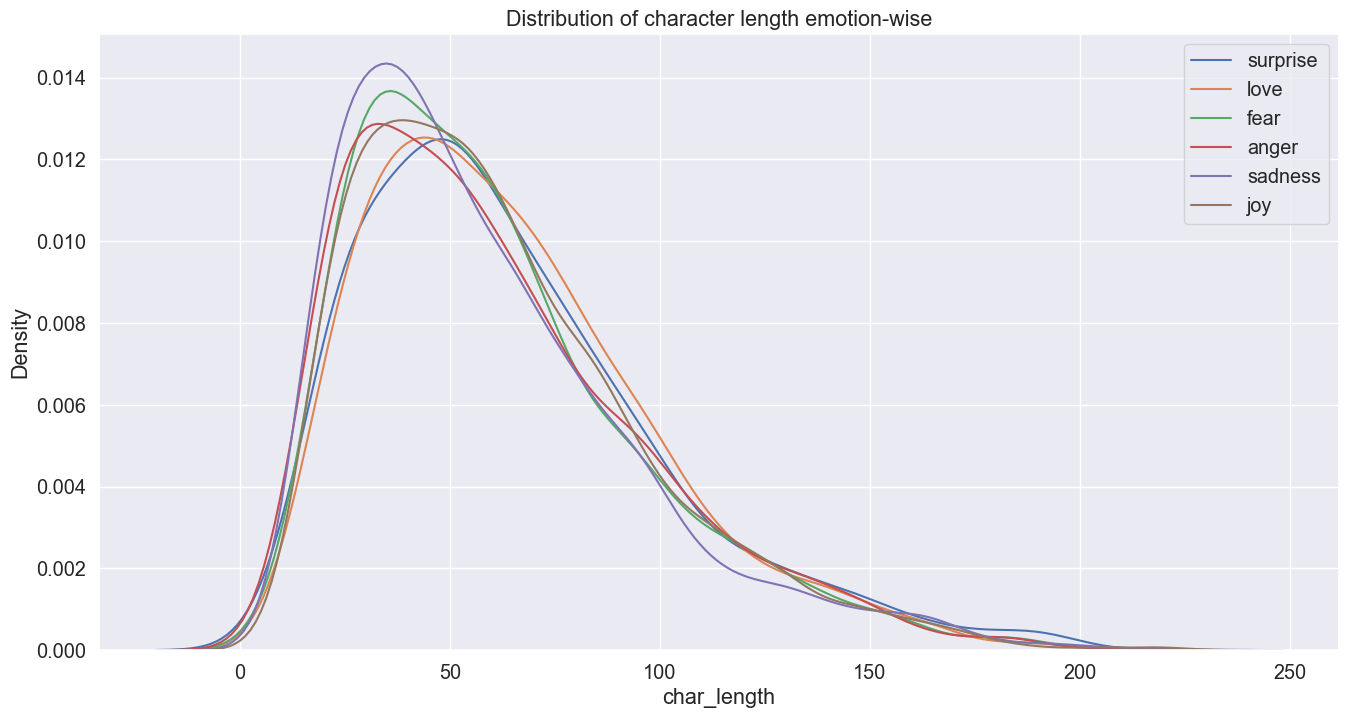

In [140]:
char_length(df_train)

In [141]:
def token_length(df):
    df['token_length'] = df['Text'].apply(lambda x : len(x.split(" ")))
    fig, ax = plt.subplots(figsize=(16,8))
    for emotion in df['Emotion'].value_counts().sort_values().index.tolist():
        sns.kdeplot(df[df['Emotion'] == emotion]['token_length'],ax=ax, label=emotion)
    ax.legend()
    ax.set_title("Distribution of token length emotion-wise")
    plt.show()

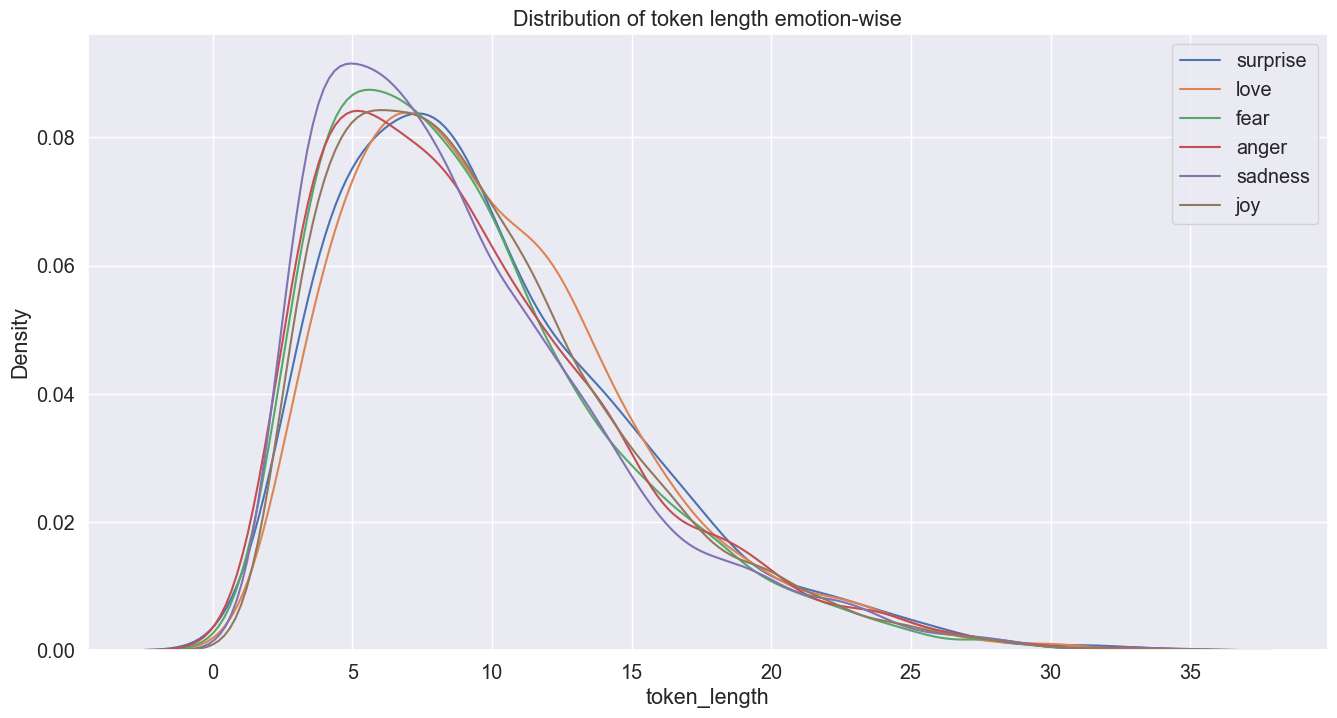

In [142]:
token_length(df_train)

In [145]:
from collections import defaultdict
def emotion_words(df, emotion):

    print("Word cloud of most frequent words for the sentiment : {}".format(emotion))

    temp_df = df[df['Emotion']==emotion]
    print("Number of Rows : ", len(temp_df))

    msg = ''
    for text in temp_df.Text:
        text = str(text)
        msg += text
        
    total = 0
    count = defaultdict(lambda: 0)
    for word in msg.split(" "):
        total += 1
        count[word] += 1
        top20pairs = sorted(count.items(), key=lambda kv: kv[1], reverse=True)[:20]
    top20words = [i[0] for i in top20pairs]
    top20freq = [i[1] for i in top20pairs]
    
    xs = np.arange(len(top20words))
    width = 0.5

    fig = plt.figure(figsize=(10,6))                                                               
    ax = fig.gca()  #get current axes
    ax.bar(xs, top20freq, width, align='center')

    ax.set_xticks(xs)
    ax.set_xticklabels(top20words)
    plt.xticks(rotation=45)
    plt.show()
    
    stopwords = set(STOPWORDS)
    # lower max_font_size, change the maximum number of word and lighten the background:
    wordcloud = WordCloud(max_font_size=50, max_words=50,stopwords=stopwords, background_color="white").generate(msg)
    plt.figure(figsize = (12, 12), facecolor = None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Word cloud of most frequent words for the sentiment : anger
Number of Rows :  2155


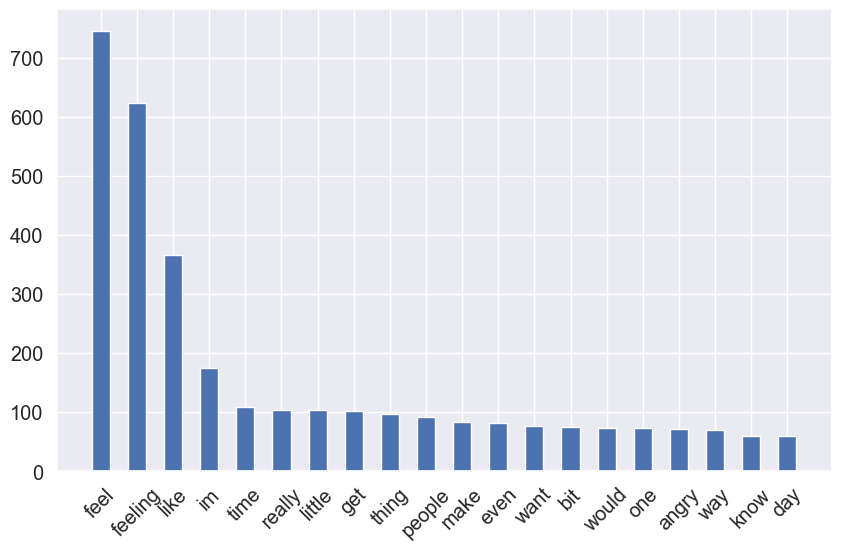

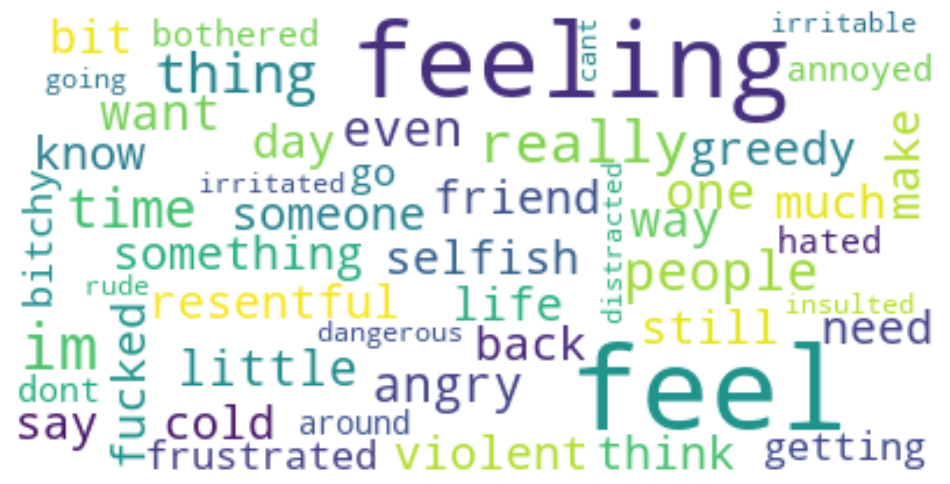

In [144]:
emotion_words(df_train, 'anger')

In [146]:
#Creating a pipline using tf-idf for words embedding and different models.
#Preprocess text
X_train = df_train['Text'].values
y_train = df_train['Emotion'].values

X_test = df_test['Text'].values
y_test = df_test['Emotion'].values

X_val = df_val['Text'].values
y_val = df_val['Emotion'].values

In [147]:
def train_model(model, data, targets):
   
    # Create a Pipeline object with a TfidfVectorizer and the given model
    text_clf = Pipeline([('vect',TfidfVectorizer()),
                         ('clf', model)])
    # Fit the model on the data and targets
    text_clf.fit(data, targets)
    return text_clf

In [148]:
def get_F1(trained_model,X,y):
  
    # Make predictions on the input data using the trained model
    predicted=trained_model.predict(X)
    # Calculate the F1 score for the predictions
    f1=f1_score(y,predicted, average=None)
    # Return the F1 score
    return f1


In [149]:
def print_score(clf, X_test, y_test):
    pred = clf.predict(X_test)
    clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
    print("Test Result:\n")
    print("="*50)
    print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
    print("_"*50)
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("_"*50)
    print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [150]:
# Encode labels
le = LabelEncoder()
df_emotions = list(np.unique(y_train))
df_emotions

['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

In [151]:
le.fit(df_emotions)
y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [152]:
list_of_emotions = list(le.classes_)
list_of_emotions

['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

In [153]:
le.transform(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'])

array([0, 1, 2, 3, 4, 5])

In [154]:
#1. Logistic Regression¶
log_reg = train_model(LogisticRegression(solver='liblinear',random_state = 0), X_train, y_train)

#test the model with the test data
y_pred=log_reg.predict(X_test)

#calculate the accuracy
log_reg_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', log_reg_accuracy,'\n')

#calculate the F1 score
f1_Score = get_F1(log_reg,X_test,y_test)
pd.DataFrame(f1_Score, index=df_train.Emotion.unique(), columns=['F1 score'])

Accuracy:  0.8685 



,F1 score
sadness,0.858223
anger,0.823810
love,0.893048
surprise,0.703704
fear,0.915683
joy,0.626263


In [155]:
print_score(log_reg, X_test, y_test)

Test Result:

Accuracy Score: 86.85%
__________________________________________________
CLASSIFICATION REPORT:
                    0           1           2           3           4  \
precision    0.893701    0.882653    0.833958    0.855856    0.897521   
recall       0.825455    0.772321    0.961151    0.597484    0.934596   
f1-score     0.858223    0.823810    0.893048    0.703704    0.915683   
support    275.000000  224.000000  695.000000  159.000000  581.000000   

                   5  accuracy    macro avg  weighted avg  
precision   0.939394    0.8685     0.883847      0.871312  
recall      0.469697    0.8685     0.760117      0.868500  
f1-score    0.626263    0.8685     0.803455      0.863224  
support    66.000000    0.8685  2000.000000   2000.000000  
__________________________________________________
Confusion Matrix: 
 [[227   4  21   0  23   0]
 [  9 173  18   0  23   1]
 [  2   4 668  15   5   1]
 [  3   0  52  95   9   0]
 [ 12   3  22   1 543   0]
 [  1  12  20   0

In [156]:
#2. K-nearest Neighbors¶
knn_clf = train_model(KNeighborsClassifier(), X_train, y_train)

#test the model with the test data
y_pred=knn_clf.predict(X_test)

#calculate the accuracy
knn_clf_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', knn_clf_accuracy,'\n')

#calculate the F1 score
f1_Score = get_F1(knn_clf,X_test,y_test)
pd.DataFrame(f1_Score, index=df_train.Emotion.unique(), columns=['F1 score'])

Accuracy:  0.7925 



,F1 score
sadness,0.761221
anger,0.762125
love,0.830137
surprise,0.626761
fear,0.835334
joy,0.520000


In [157]:
print_score(knn_clf, X_test, y_test)

Test Result:

Accuracy Score: 79.25%
__________________________________________________
CLASSIFICATION REPORT:
                    0           1           2           3           4  \
precision    0.751773    0.789474    0.792157    0.712000    0.832479   
recall       0.770909    0.736607    0.871942    0.559748    0.838210   
f1-score     0.761221    0.762125    0.830137    0.626761    0.835334   
support    275.000000  224.000000  695.000000  159.000000  581.000000   

                   5  accuracy    macro avg  weighted avg  
precision   0.764706    0.7925     0.773765      0.790739  
recall      0.393939    0.7925     0.695226      0.792500  
f1-score    0.520000    0.7925     0.722596      0.788151  
support    66.000000    0.7925  2000.000000   2000.000000  
__________________________________________________
Confusion Matrix: 
 [[212   6  27   5  25   0]
 [ 17 165  13   2  23   4]
 [ 18  16 606  20  32   3]
 [  9   1  50  89  10   0]
 [ 22  10  53   8 487   1]
 [  4  11  16   1

In [158]:
#3. Decision Tree¶
#Train the model with the training data
DT = train_model(DecisionTreeClassifier(random_state = 42), X_train, y_train)

#test the model with the test data
y_pred=DT.predict(X_test)

#calculate the accuracy
DT_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', DT_accuracy,'\n')

#calculate the F1 score
f1_Score = get_F1(DT,X_test,y_test)
pd.DataFrame(f1_Score, index=df_train.Emotion.unique(), columns=['F1 score']) 

Accuracy:  0.8595 



,F1 score
sadness,0.867857
anger,0.810811
love,0.889213
surprise,0.756098
fear,0.897678
joy,0.601504


In [159]:
print_score(DT, X_test, y_test)

Test Result:

Accuracy Score: 85.95%
__________________________________________________
CLASSIFICATION REPORT:
                    0           1           2           3           4  \
precision    0.852632    0.818182    0.901034    0.733728    0.896907   
recall       0.883636    0.803571    0.877698    0.779874    0.898451   
f1-score     0.867857    0.810811    0.889213    0.756098    0.897678   
support    275.000000  224.000000  695.000000  159.000000  581.000000   

                   5  accuracy    macro avg  weighted avg  
precision   0.597015    0.8595     0.799916      0.860567  
recall      0.606061    0.8595     0.808215      0.859500  
f1-score    0.601504    0.8595     0.803860      0.859878  
support    66.000000    0.8595  2000.000000   2000.000000  
__________________________________________________
Confusion Matrix: 
 [[243   9   5   1  15   2]
 [  9 180   4   1  19  11]
 [ 13   5 610  38  20   9]
 [  3   0  28 124   2   2]
 [ 16  14  21   5 522   3]
 [  1  12   9   0

In [160]:
#Support Vector Machine
#Train the model with the training data
SVM = train_model(SVC(kernel='rbf', gamma=0.1, C=1.0, random_state=42), X_train, y_train)

#test the model with the test data
y_pred=SVM.predict(X_test)

#calculate the accuracy
SVM_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', SVM_accuracy,'\n')

#calculate the F1 score
f1_Score = get_F1(SVM,X_test,y_test)
pd.DataFrame(f1_Score, index=df_train.Emotion.unique(), columns=['F1 score']) 

Accuracy:  0.8055 



,F1 score
sadness,0.734607
anger,0.737913
love,0.831611
surprise,0.544643
fear,0.891156
joy,0.527473


In [161]:
print_score(SVM, X_test, y_test)

Test Result:

Accuracy Score: 80.55%
__________________________________________________
CLASSIFICATION REPORT:
                    0           1           2           3           4  \
precision    0.882653    0.857988    0.720000    0.938462    0.880672   
recall       0.629091    0.647321    0.984173    0.383648    0.901893   
f1-score     0.734607    0.737913    0.831611    0.544643    0.891156   
support    275.000000  224.000000  695.000000  159.000000  581.000000   

                   5  accuracy    macro avg  weighted avg  
precision   0.960000    0.8055     0.873296      0.829782  
recall      0.363636    0.8055     0.651627      0.805500  
f1-score    0.527473    0.8055     0.711234      0.792226  
support    66.000000    0.8055  2000.000000   2000.000000  
__________________________________________________
Confusion Matrix: 
 [[173   3  70   0  29   0]
 [  9 145  42   0  28   0]
 [  2   2 684   3   3   1]
 [  3   0  87  61   8   0]
 [  8   3  45   1 524   0]
 [  1  16  22   0

In [162]:
#5. Random Forest¶
#Train the model with the training data
RF = train_model(RandomForestClassifier(n_estimators=1000, random_state=42), X_train, y_train)

#test the model with the test data
y_pred=RF.predict(X_test)

#calculate the accuracy
RF_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', RF_accuracy,'\n')

#calculate the F1 score
f1_Score = get_F1(RF, X_test, y_test)
pd.DataFrame(f1_Score, index=df_train.Emotion.unique(), columns=['F1 score']) 

Accuracy:  0.889 



,F1 score
sadness,0.899452
anger,0.862144
love,0.910238
surprise,0.742475
fear,0.935652
joy,0.611570


In [163]:
print_score(RF, X_test, y_test)

Test Result:

Accuracy Score: 88.90%
__________________________________________________
CLASSIFICATION REPORT:
                    0           1           2           3           4  \
precision    0.904412    0.845494    0.887825    0.792857    0.945518   
recall       0.894545    0.879464    0.933813    0.698113    0.925990   
f1-score     0.899452    0.862144    0.910238    0.742475    0.935652   
support    275.000000  224.000000  695.000000  159.000000  581.000000   

                   5  accuracy    macro avg  weighted avg  
precision   0.672727     0.889     0.841472      0.887476  
recall      0.560606     0.889     0.815422      0.889000  
f1-score    0.611570     0.889     0.826922      0.887558  
support    66.000000     0.889  2000.000000   2000.000000  
__________________________________________________
Confusion Matrix: 
 [[246   9   9   1   9   1]
 [  8 197   0   1  12   6]
 [  4   5 649  22   8   7]
 [  2   0  43 111   1   2]
 [ 11   6  19   5 538   2]
 [  1  16  11   0

In [164]:
# Ensure all accuracy variables are floats
log_reg_accuracy = float(log_reg_accuracy)
knn_clf_accuracy = float(knn_clf_accuracy)
DT_accuracy = float(DT_accuracy)
SVM_accuracy = float(SVM_accuracy)
RF_accuracy = float(RF_accuracy)

# Create the DataFrame
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-neighbour Classifier', 'Decision Tree','Support Vector Machine','Random Forest'],
    'Accuracy': [log_reg_accuracy, knn_clf_accuracy, DT_accuracy,
                 SVM_accuracy, RF_accuracy]
})

# Sort the DataFrame by Accuracy
sorted_models = models.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print(sorted_models)

                    Model  Accuracy
0           Random Forest    0.8890
1     Logistic Regression    0.8685
2           Decision Tree    0.8595
3  Support Vector Machine    0.8055
4  K-neighbour Classifier    0.7925
